# Projekt DS & KI (Wein-Datensatz)
Gruppenmitglieder:  
Clemens Fleischhauer, Nils Groetelaers, Nikita Helwer, Carl Placek, Julian Krupp

# Unser Datensatz:

https://archive.ics.uci.edu/dataset/186/wine+quality

# SMART-Ziel:

Wir wollen untersuchen, welchen Einfluss chemische Faktoren wie der Alkohol-Prozentgehalt auf die Weinqualität haben. Der UCI-Weindatensatz liefert mit ca. 5000 Weißwein- und ca. 1500 Rotweinproben ausreichend Daten, um erste Schlüsse zu ziehen. Unser Ziel ist die Analyse von Korrelationen und weiteren Zusammenhängen, sowie deren Schilderung und Dokumentation innerhalb der vorgegebenen Zeit (bis 23.11.).

# Quellen:

*1. Quelle*

**Titel:** Modeling Wine Quality from Physicochemical Properties (2019)  
**Autor:** Dale Angus (Stanford University)

https://cs229.stanford.edu/proj2019aut/data/assignment_308832_raw/25895690.pdf

**Erkenntnisse aus der Quelle:**  
Anhand der vier Größen chlorides, total sulfur dioxide, fixed acidity und pH oder chlorides, total sulfur dioxide, volatile acidity und free sulfur dioxide lässt sich die Weinqualität mithilfe eines Neural Network Models mit einer 99%-igen Sicherheit voraussagen. 

-> Andere Parameter neben Alkohol sind gut geeignet, um die Weinqualität vorauszusagen. Daher hat Alkohol vermutlich einen kleineren Einfluss auf die Weinqualität als die anderen zur Vorhersage benutzten Parameter.

*2. Quelle*

**Titel:** Modeling wine preferences by data mining from physicochemical properties (2009)  
**Autoren:** Paulo Cortez, António Cerdeira, Fernando Almeida, Telmo Matos, José Reis (Viticulture Commission of the Vinho Verde region)

https://projects.csail.mit.edu/wiki/pub/Evodesign/SensoryEvaluationsDatabase/winequality09.pdf

**Erkenntnisse aus der Quelle:**  
Zitat aus der Quelle (Seite 11-13): "Beispielsweise führt eine Erhöhung des Alkoholgehalts [...] tendenziell zu einer höheren Weinqualität. [...] Weiterhin hat die volatile Acidität einen negativen Einfluss [auf die Weinqualität] [...]"

# Aufgabe 1:

## Einlesen des Datensatzes (und Entfernung der Duplikate)

### Weißwein-Code

In [48]:
# Datensatz Weißwein
import pandas as pd

ww_original = pd.read_csv('winequality-white.csv', sep=';')

# Duplikate entfernen:
ww = ww_original.drop_duplicates().reset_index(drop=True)

print(ww.head())

print("=====================================================================================================================================>")

print(ww.columns) # Spaltenermittlung

print("=====================================================================================================================================>")

print(ww.index)    # Zeilenermittlung

print("=====================================================================================================================================>")

# ohne print aufgrund der besseren Darstellung
ww.describe()

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Rotwein-Code

In [49]:
# Datensatz Rotwein
import pandas as pd

rw_original = pd.read_csv('winequality-red.csv', sep=';')

# Duplikate entfernen:
rw = rw_original.drop_duplicates().reset_index(drop=True)

print("=====================================================================================================================================>")

print(rw.head())

print("=====================================================================================================================================>")

print(rw.columns) # Spaltenermittlung

print("=====================================================================================================================================>")

print(rw.index)   # Zeilenermittlung

print("=====================================================================================================================================>")

# ohne print aufgrund der besseren Darstellung
rw.describe()

=====================================================================================================================================>
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0    

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Anzahl Zeilen und Spalten und deren Bedeutung

Wir nutzen für sämtliche Aufgaben den Datensatz ohne Duplikate. (Nähere Erklärung: siehe [Aufgabe 6.3](#aufgabe-6.3))

### Datensatz Rotwein (ursprünglich / nach Entfernung der Duplikate)

Anzahl Zeilen: 1599 / 1359

Anzahl Spalten: 12

### Datensatz Weißwein (ursprünglich / nach Entfernung der Duplikate)

Anzahl Zeilen: 4898 / 3961

Anzahl Spalten: 12

### Spalten (gleich für beide Datensätze):

**"fixed acidity (g/L)"** = stabile Säuren, bestimmen den pH-Wert und Geschmack

**"volatile acidity (g/L)"** = in geringen Mengen für Aroma gewünscht, zu viel ist ein Weinfehler

**"citric acid (g/L)"** =  Teil der fixen Säuren, trägt zur Frische bei

**"residual sugar (g/L)"** = unvergorener Zucker im Wein

**"chlorides (g/L)"** = Salze, die den Salzgehalt beeinflussen

**"free sulfur dioxide (mg/L)"** = schützt Wein vor Oxidation und unerwünschten Mikroorganismen

**"total sulfur dioxide (mg/L)"** = Summe aus freiem und gebundenem SO2, Gesamtschutz des Weins

**"density (g/cm^3)"** = Dichte des Weins

**"pH (1-14)"** = 1-7 heißt sauer, 7-14 ist basisch

**"sulphates (g/L)"** = Salze der Schwefelsäure, können die Stabilität und Konservierung des Weins beeinflussen

**"alcohol (%)"** = Alkoholgehalt

**"quality (1-10)"** = Qualität (Median aus Bewertung von mind. 3 Personen per Blindtest) auf Zehner-Skala

### Wenden Sie ww.describe() an. Welche Spalten könnten Ausreißer enthalten?

Ausreißer könnten bei residual sugar, chlorides, free sulfur dioxide und total sulfur dioxide vorkommen, denn der maximale Wert ist teils ein erhebliches Vielfaches des 75%-Perzentil-Wert

# Aufgabe 2:

## Welche Fragestellungen für Ihren Datensatz können Sie mit der Indizierung und Manipulation bzw. Gruppierungsfunktion lösen?

### Wie viel Prozent der Weine haben eine Qualität von 8 oder höher? (8 oder höher entspricht einer sehr hohen Qualität)

### Weißwein-Code

In [50]:
# Datensatz Weißwein
ww[ww.quality>=8] # 136 rows -> 136 Weißweine haben eine Qualität von 8 oder höher. 

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              6.2             0.660         0.48             1.2      0.029   
17              6.8             0.260         0.42             1.7      0.049   
59              6.7             0.230         0.31             2.1      0.046   
134             5.2             0.440         0.04             1.4      0.036   
161             6.8             0.530         0.35             3.8      0.034   
...             ...               ...          ...             ...        ...   
3844            5.2             0.300         0.34             1.5      0.038   
3845            6.4             0.320         0.25             5.0      0.055   
3861            4.4             0.320         0.39             4.3      0.030   
3862            3.9             0.225         0.40             4.2      0.030   
3873            5.8             0.280         0.34             2.2      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                   29.0                  75.0  0.98920  3.33       0.39   
17                   41.0                 122.0  0.99300  3.47       0.48   
59                   30.0                  96.0  0.99260  3.33       0.64   
134                  43.0                 119.0  0.98940  3.36       0.33   
161                  26.0                 109.0  0.99060  3.26       0.57   
...                   ...                   ...      ...   ...        ...   
3844                 18.0                  96.0  0.98942  3.56       0.48   
3845                 28.0                 138.0  0.99171  3.27       0.50   
3861                 31.0                 127.0  0.98904  3.46       0.36   
3862                 29.0                 118.0  0.98900  3.57       0.36   
3873                 24.0                 125.0  0.98986  3.36       0.33   

      alcohol  quality  
13       12.8        8  
17       10.5        8  
59       10.7        8  
134      12.1        8  
161      12.7        8  
...       ...      ...  
3844     13.0        8  
3845     12.4        8  
3861     12.8        8  
3862     12.8        8  
3873     12.8        8  

[136 rows x 12 columns]

In [51]:
# Datensatz Rotwein
rw[rw.quality>=8] #  17 rows -> Nur 17 Rotweine haben eine Qualität von 8 oder höher.

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
235             7.9              0.35         0.46             3.6      0.078   
242            10.3              0.32         0.45             6.4      0.073   
341             5.6              0.85         0.05             1.4      0.045   
383            12.6              0.31         0.72             2.2      0.072   
397            11.3              0.62         0.67             5.2      0.086   
421             9.4              0.30         0.56             2.8      0.080   
434            10.7              0.35         0.53             2.6      0.070   
510             5.0              0.42         0.24             2.0      0.060   
715             7.8              0.57         0.09             2.3      0.065   
903             9.1              0.40         0.50             1.8      0.071   
927            10.0              0.26         0.54             1.9      0.083   
952             7.9              0.54         0.34             2.5      0.076   
1025            8.6              0.42         0.39             1.8      0.068   
1081            5.5              0.49         0.03             1.8      0.044   
1190            7.2              0.33         0.33             1.7      0.061   
1229            7.2              0.38         0.31             2.0      0.056   
1317            7.4              0.36         0.30             1.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
235                  15.0                  37.0  0.99730  3.35       0.86   
242                   5.0                  13.0  0.99760  3.23       0.82   
341                  12.0                  88.0  0.99240  3.56       0.82   
383                   6.0                  29.0  0.99870  2.88       0.82   
397                   6.0                  19.0  0.99880  3.22       0.69   
421                   6.0                  17.0  0.99640  3.15       0.92   
434                   5.0                  16.0  0.99720  3.15       0.65   
510                  19.0                  50.0  0.99170  3.72       0.74   
715                  34.0                  45.0  0.99417  3.46       0.74   
903                   7.0                  16.0  0.99462  3.21       0.69   
927                  42.0                  74.0  0.99451  2.98       0.63   
952                   8.0                  17.0  0.99235  3.20       0.72   
1025                  6.0                  12.0  0.99516  3.35       0.69   
1081                 28.0                  87.0  0.99080  3.50       0.82   
1190                  3.0                  13.0  0.99600  3.23       1.10   
1229                 15.0                  29.0  0.99472  3.23       0.76   
1317                 17.0                  24.0  0.99419  3.24       0.70   

      alcohol  quality  
235      12.8        8  
242      12.6        8  
341      12.9        8  
383       9.8        8  
397      13.4        8  
421      11.7        8  
434      11.0        8  
510      14.0        8  
715      12.7        8  
903      12.5        8  
927      11.8        8  
952      13.1        8  
1025     11.7        8  
1081     14.0        8  
1190     10.0        8  
1229     11.3        8  
1317     11.4        8

Nur **136 Weißweine** und **17 Rotweine** haben eine **Qualität von 8 oder höher**. Das entspricht 153/5320 Weinproben **(~ 2,88% aller getesteten Weine)**.

### Was ist der durchschnittliche Alkoholgehalt für jede Weinqualität?

### Weißwein-Code

In [52]:
# Datensatz Weißwein
ww_mean_alcohol_for_each_quality = ww.groupby('quality')['alcohol'].mean()

print(f"Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe im Weißwein-Datensatz (Stufe 1, 2, 10 sind im Datensatz nicht vergeben):\n"
      f"\n{ww_mean_alcohol_for_each_quality}")

Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe im Weißwein-Datensatz (Stufe 1, 2, 10 sind im Datensatz nicht vergeben):

quality
3    10.345000
4    10.197712
5     9.864182
6    10.646122
7    11.515844
8    11.880153
9    12.180000
Name: alcohol, dtype: float64


### Rotwein-Code

In [53]:
# Datensatz Rotwein
rw_mean_alcohol_for_each_quality = rw.groupby('quality')['alcohol'].mean()

print(f"Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe im Rotwein-Datensatz (Stufe 1, 2, 9, 10 sind im Datensatz nicht vergeben):\n"
      f"\n{rw_mean_alcohol_for_each_quality}")

Durchschnittlicher Alkoholgehalt für jede Qualitätsstufe im Rotwein-Datensatz (Stufe 1, 2, 9, 10 sind im Datensatz nicht vergeben):

quality
3     9.955000
4    10.265094
5     9.888562
6    10.658879
7    11.491118
8    12.158824
Name: alcohol, dtype: float64


- tatsächlich haben qualitativ hochwertige Weine auch höheren Alkoholanteil
- geringere Mengen an hochqualitativen Weinen, d. h. Ausreißer haben stärkere Wirkung

## Formulieren Sie Hypothesen.

**Hypothese 1:**  
Der Datensatz ist hinsichtlich der Acidität schlüssig, d. h. der Wert für citric acid muss stets geringer sein als der Wert für fixed acidity.

### Weißwein-Code

In [54]:
# Datensatz Weißwein
ww_fa_minus_ca = ww['fixed acidity']-ww['citric acid']
# positiv für alle Proben (logisch, da Zitronensäure eine fixe Säure ist)

schluessig = True

if ww_fa_minus_ca.min() < 0:
    schluessig = False

print(f"Fixe Acidität minus Zitronensäure (Weißwein):\n"
      f"\n{ww_fa_minus_ca}")
print(f"Schlüssig: {schluessig}")

Fixe Acidität minus Zitronensäure (Weißwein):

0       6.64
1       5.96
2       7.70
3       6.88
4       6.04
        ... 
3956    5.91
3957    6.24
3958    6.31
3959    5.20
3960    5.62
Length: 3961, dtype: float64
Schlüssig: True


### Rotwein-Code

In [55]:
# Datensatz Rotwein
rw_fa_minus_ca = rw['fixed acidity']-rw['citric acid']
# positiv für alle Proben (logisch, da Zitronensäure eine fixe Säure ist)

schluessig = True

if rw_fa_minus_ca.min() < 0:
    schluessig = False

print(f"Fixe Acidität minus Zitronensäure (Rotwein):\n"
      f"\n{rw_fa_minus_ca}")
print(f"Schlüssig: {schluessig}")

Fixe Acidität minus Zitronensäure (Rotwein):

0        7.40
1        7.80
2        7.76
3       10.64
4        7.40
        ...  
1354     6.72
1355     6.12
1356     5.80
1357     5.78
1358     5.53
Length: 1359, dtype: float64
Schlüssig: True


"fixed acidity" ist stets größer als "citric acid", demnach ist der Datensatz hinsichtlich den Werten der Acidität schlüssig.

**Hypothese 2:**  
Hohe volatile Acidität weißt auf verdorbenen Wein hin und wirkt sich deshalb negativ auf die Qualität aus.

### Weißwein-Code

In [56]:
# Datensatz Weißwein
mean_weisswein_high_va = ww[ww['volatile acidity']>0.33]['quality'].mean() 
# gibt Durchschnittsqualität für alle Weißweinproben mit volatile acidity >= 0.33 g/L (über 75%-Perzentil) aus

mean_weisswein_low_va = ww[ww['volatile acidity']<=0.33]['quality'].mean() 
# gibt Durchschnittsqualität für alle Weißweinproben mit volatile acidity <= 0.21 g/L (unter/gleich 75%-Perzentil) aus

print(f"Durchschnittliche Qualität bei hoher volatiler Acidität (Weißwein): {mean_weisswein_high_va}\n")

print(f"Durchschnittliche Qualität bei normaler volatiler Acidität (Weißwein): {mean_weisswein_low_va}")

Durchschnittliche Qualität bei hoher volatiler Acidität (Weißwein): 5.682022471910113

Durchschnittliche Qualität bei normaler volatiler Acidität (Weißwein): 5.904916965157929


### Rotwein-Code

In [57]:
# Datensatz Rotwein
mean_rotwein_high_va = rw[rw['volatile acidity']>0.64]['quality'].mean() 
# gibt Durchschnittsqualität für alle Rotweinproben mit volatile acidity >= 0.64 g/L (über 75%-Perzentil) aus

mean_rotwein_low_va = rw[rw['volatile acidity']<=0.64]['quality'].mean() 
# gibt Durchschnittsqualität für alle Rotweinproben mit volatile acidity <= 0.39 g/L (unter/gleich 75%-Perzentil) aus

print(f"Durchschnittliche Qualität bei hoher volatiler Acidität (Rotwein): {mean_rotwein_high_va}\n")

print(f"Durchschnittliche Qualität bei normaler volatiler Acidität (Rotwein): {mean_rotwein_low_va}")

Durchschnittliche Qualität bei hoher volatiler Acidität (Rotwein): 5.243161094224924

Durchschnittliche Qualität bei normaler volatiler Acidität (Rotwein): 5.744660194174758


- trifft eher zu
- durchschnittliche Qualität bei hoher volatile acidity (über dem 75% Perzentil) liegt bei Rot- und Weißwein ein wenig unter dem Durchschnitt:
- Weißwein: durchschnittl. Qualität = 5.85, durchschnittl. Qualität bei hoher volatile acidity = 5.68
- Rotwein: durchschnittl. Qualität = 5.62, durchschnittl. Qualität bei hoher volatile acidity = 5.24

-> im Vergleich dazu ist durchschnittl. Qualität bei normaler volatile acidity leicht über dem Durchschnitt  
-> genauere Untersuchung nötig

**Untersuchung bei sehr hoher volatile acidity:**

### Weißwein-Code

In [58]:
# Datensatz Weißwein
mean_weisswein_high_va = ww[ww['volatile acidity']>0.9]['quality'].mean() 
# gibt Durchschnittsqualität für alle Weißweinproben mit volatile acidity > 0.9 g/L aus

mean_weisswein_low_va = ww[ww['volatile acidity']<=0.9]['quality'].mean() 
# gibt Durchschnittsqualität für alle Weißweinproben mit volatile acidity <= 0.9 g/L aus
print(f"Durchschnittliche Qualität bei sehr hoher volatiler Acidität (Weißwein): {mean_weisswein_high_va}\n")

print(f"Durchschnittliche Qualität bei normaler/hoher volatiler Acidität (Weißwein): {mean_weisswein_low_va}")

Durchschnittliche Qualität bei sehr hoher volatiler Acidität (Weißwein): 4.5

Durchschnittliche Qualität bei normaler/hoher volatiler Acidität (Weißwein): 5.856890012642225


### Rotwein-Code

In [59]:
# Datensatz Rotwein
mean_rotwein_high_va = rw[rw['volatile acidity']>0.9]['quality'].mean() 
# gibt Durchschnittsqualität für alle Rotweinproben mit volatile acidity > 0.9 g/L aus

mean_rotwein_low_va = rw[rw['volatile acidity']<=0.9]['quality'].mean() 
# gibt Durchschnittsqualität für alle Rotweinproben mit volatile acidity <= 0.9 g/L aus

print(f"Durchschnittliche Qualität bei sehr hoher volatiler Acidität (Rotwein): {mean_rotwein_high_va}\n")

print(f"Durchschnittliche Qualität bei normaler/hoher volatiler Acidität (Rotwein): {mean_rotwein_low_va}")

Durchschnittliche Qualität bei sehr hoher volatiler Acidität (Rotwein): 4.767441860465116

Durchschnittliche Qualität bei normaler/hoher volatiler Acidität (Rotwein): 5.651215805471125


Die **Qualitätsunterschiede zwischen sehr hoher und normaler/hoher volatile acidity** bewegen sich **zwischen ~ 1.35 (Weißwein) und ~ 0.9 (Rotwein)**. Das ist bei einer Skala von 1-10, bei der zum Großteil nur 6 Qualitätsstufen belegt werden (3-8), eine durchaus erwähnenswerte Feststellung. Es besteht also zumindest eine **Korrelation zwischen sehr hoher volatile acidity und niedrigerer Qualität**.

# Aufgabe 3:

## Bestimmen Sie Lage- und Streuungsmaße der Merkmale in Ihrem Datensatz. Verwenden Sie df.describe()

### Weißwein-Code

In [60]:
# Datensatz Weißwein
ww.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Rotwein-Code

In [61]:
# Datensatz Rotwein
rw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

(50% = Median, std [standard deviation] = Standartabweichung, mean = Arithmetisches Mittel)

## Haben Sie diese Ergebnisse erwartet?

Im Allgemeinen sind diese Ergebnisse zu erwarten. Es gibt keinen sofort ins Auge stechenden Wert wie z. B. ein Alkoholgehalt von 30%.

## Spannende Erkenntnisse:

- pH ist bei rund 3, was für ein Getränk relativ sauer ist. Ein saurer pH-Wert (kleiner als 7) bei Wein ist allerdings nicht verwunderlich.
- Geringer Effekt des Alkoholgehalts auf die Dichte: Arithmetisches Mittel der Dichte ist rund 1, obwohl durchschnittlich etwa 10% Alkohol im Wein enthalten sind. Die Dichte von Alkohol ist aber bei Raumtemperatur um 20% geringer als die Dichte von Wasser (Ethanol: 0,8 g/cm^3, Wasser: 1 g/cm^3).

## Liegen Mittelwert und Median weit auseinander? Wie groß ist die Streuung?

Median und Mittelwert stehen in allen Fällen (bei Weiß- und Rotwein) nah beieinander, was auf eine geringe Streuung hinweist.  
Auffällig sind nur die relativ große Standartabweichung sowie Spanne zwischen Minimum und Maximum bei residual sugar und beiden Kategorien des sulfur dioxide. Diese Streuung ist wie folgt zu erklären: Bei Plan zum späteren Verkauf/Konsum muss sulfur dioxide höher sein, um den Wein lagern zu können. Zucker schwankt aufgrund der Weinsorten stärker, denn ein lieblicher oder halbtrockener Wein enthält mehr Zucker als ein trockener Wein. Leider ist die genaue Weinkategorie nicht im Datensatz angegeben.

# Aufgabe 4:

## Skalenniveaus der Merkmale

| Merkmal | Skalenniveau | Bedeutung | Einheit |
|---------------|---------------|---------------|---------------|
| fixed acidity | kardinal | stabile Säuren, bestimmen den pH-Wert und Geschmack | g/L |
| volatile acidity | kardinal | in geringen Mengen für Aroma gewünscht, zu viel ist ein Weinfehler | g/L |
| citric acid | kardinal | Teil der fixen Säuren, trägt zur Frische bei | g/L |
| residual sugar | kardinal | unvergorener Zucker im Wein | g/L |
| chlorides | kardinal | Salze, die den Salzgehalt beeinflussen | g/L |
| free sulfur dioxide | kardinal | schützt Wein vor Oxidation und unerwünschten Mikroorganismen | mg/L |
| total sulfur dioxide | kardinal | Summe aus freiem und gebundenem SO2, Gesamtschutz des Weins | mg/L |
| density | kardinal | Dichte des Weins | g/cm^3 |
| pH | kardinal | 1 - 7 heißt sauer, 7 - 14 ist basisch | 1 - 14 |
| sulphates | kardinal | Salze der Schwefelsäure, können die Stabilität und Konservierung des Weins beeinflussen | g/L |
| alcohol | kardinal | Alkoholgehalt | % |
| quality | ordinal / kardinal, wir betrachten es als kardinal | Qualität / Geschmack | 1 - 10 |

# Aufgabe 4.1:

## Basierend auf den bestimmten Skalenniveaus, welche Korrellationskoeffizienten möchten Sie anwenden?
- Bravais-Pearson-Korrelationskoeffizient, da wir hauptsächlich bzw. nur kardinal skalierte Variablen untersuchen

## Prüfen Sie mögliche Zusammenhänge. Waren die Ergebnisse zu erwarten?

In [62]:
kardinal_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
                   'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

### Weißwein-Code

In [63]:
# Datensatz Weißwein
ww[kardinal_columns].corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.019214     0.298959   
volatile acidity          -0.019214          1.000000    -0.163228   
citric acid                0.298959         -0.163228     1.000000   
residual sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free sulfur dioxide       -0.058396         -0.102471     0.091681   
total sulfur dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
quality                   -0.124636         -0.190678     0.007065   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.083620   0.024036            -0.058396   
volatile acidity            0.098340   0.086287            -0.102471   
citric acid                 0.106269   0.132590             0.091681   
residual sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free sulfur dioxide         0.306835   0.101272             1.000000   
total sulfur dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   
quality                    -0.117339  -0.217739             0.010507   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric acid                       0.122845  0.160076 -0.183015   0.049442   
residual sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free sulfur dioxide               0.619437  0.294638 -0.007750   0.037932   
total sulfur dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   
quality                          -0.183356 -0.337805  0.123829   0.053200   

                       alcohol   quality  
fixed acidity        -0.110788 -0.124636  
volatile acidity      0.046815 -0.190678  
citric acid          -0.076514  0.007065  
residual sugar       -0.398167 -0.117339  
chlorides            -0.356928 -0.217739  
free sulfur dioxide  -0.251768  0.010507  
total sulfur dioxide -0.446643 -0.183356  
density              -0.760162 -0.337805  
pH                    0.093095  0.123829  
sulphates            -0.022850  0.053200  
alcohol               1.000000  0.462869  
quality               0.462869  1.000000

### Rotwein-Code

In [64]:
# Datensatz Rotwein
rw[kardinal_columns].corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

### erwähnenswerte Zusammenhänge im Weißwein - Datensatz:
- fixed acidity - pH (-0.43, denn Menge an Säure im Wein bestimmt pH-Wert)
- residual sugar - total sulfur dioxide (0.41)
- residual sugar - density (0.82, denn gelöster Zucker beinflusst Dichte)
- residual sugar - alcohol (-0.40, denn Zucker gärt zu Alkohol)
- free sulfur dioxide - total sulfur dioxide (0.62, denn free sulfur dioxide ist ein Teil der total sulfur dioxide)
- total sulfur dioxide - density(0.54)
- total sulfur dioxide - alcohol (-0.45)
- density - alcohol (-0.76)
- alcohol - quality (0.46)

### erwähnenswerte Zusammenhänge im Rotwein - Datensatz:
- fixed acidity - citric acid (0.67, denn citric acid ist ein Teil der fixed acidity)
- fixed acidity - density (0.67)
- fixed acidity - pH (-0.69, denn Menge an Säure im Wein bestimmt pH-Wert)
- volatile acidity - citric acid (-0.55)
- volatile acidity - quality (-0.40)
- citric acid - pH (-0.55, , denn Menge an Säure im Wein bestimmt pH-Wert)
- free sulfur dioxide - total sulfur dioxide (0.67, denn free sulfur dioxide ist ein Teil der total sulfur dioxide)
- density - alcohol (-0.50)
- alcohol - quality (0.48)

Zusammenhänge von z. B. fixed acidity und citric acid (v. a. im Rotwein - Datensatz zu erkennen) waren abzusehen, da citric acid ein Bestandteil der fixed acidity ist. Hingegen andere Korrelationen wie z. B. zwischen residual sugar und total sulfur dioxide (Weißwein - Datensatz) sind neue Ergebnisse. Es gibt also sowohl klar absehbare als auch neue Korrelationen.

# Aufgabe 4.2

## Visualisierungen des Datensatzes

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def plot_binned_quality(df_color: pd.DataFrame, title):
    alcohol = df_color["alcohol"]
    num_bins = 6 # Anzahl der Bereiche auf der x-Achse
    bins = np.linspace(alcohol.min(), alcohol.max(), num_bins + 1)
    labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(num_bins)]

    tmp = df_color.copy()
    tmp["alcohol_bin"] = pd.cut(alcohol, bins=bins, labels=labels, include_lowest=True)
    mean_quality = tmp.groupby("alcohol_bin", observed=False)["quality"].mean()

    plt.figure(figsize=(8, 4))
    plt.plot(mean_quality.index.astype(str), mean_quality.values, marker="o")
    plt.xlabel("Alkohol-Intervalle (%)")
    plt.ylabel("Durchschnittliche Qualität")
    plt.title(title)
    plt.tight_layout()
    plt.grid(True, alpha=0.25, linestyle='-', color='gray')
    plt.show()

### Weißwein-Code

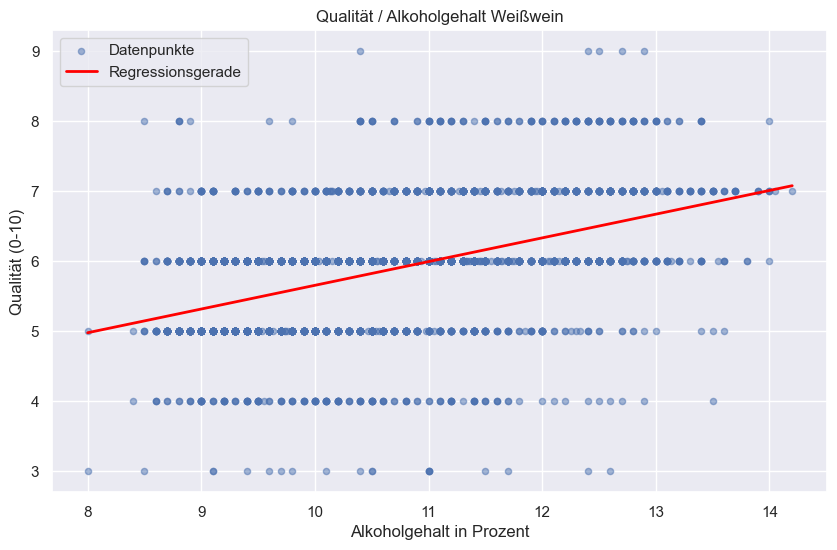

In [66]:
x = ww["alcohol"]
y = ww["quality"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=20, label="Datenpunkte")
plt.grid(True)

m, c = np.polyfit(x, y, 1)
x_sorted = np.sort(x)
y_regression = m * x_sorted + c
plt.plot(x_sorted, y_regression, color='red', linewidth=2, label=f'Regressionsgerade')

plt.title("Qualität / Alkoholgehalt Weißwein")
plt.xlabel("Alkoholgehalt in Prozent")
plt.ylabel("Qualität (0-10)")
plt.legend()
plt.show()

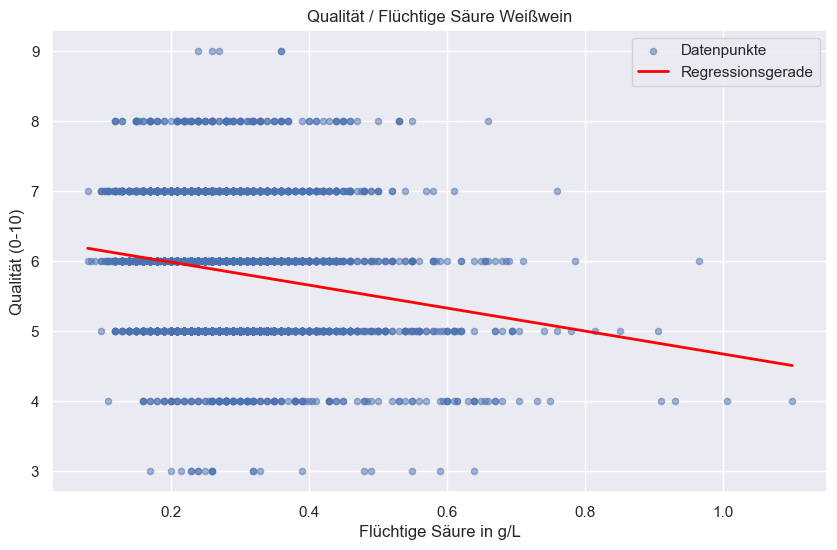

In [67]:
x = ww["volatile acidity"]
y = ww["quality"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=20, label="Datenpunkte")
plt.grid(True)

# Erstellung Regressionsgerade
m, c = np.polyfit(x, y, 1)
x_sorted = np.sort(x)
y_regression = m * x_sorted + c
plt.plot(x_sorted, y_regression, color='red', linewidth=2, label=f'Regressionsgerade')

plt.title("Qualität / Flüchtige Säure Weißwein")
plt.xlabel("Flüchtige Säure in g/L") # also volatile acidity
plt.ylabel("Qualität (0-10)")
plt.legend()
plt.show()

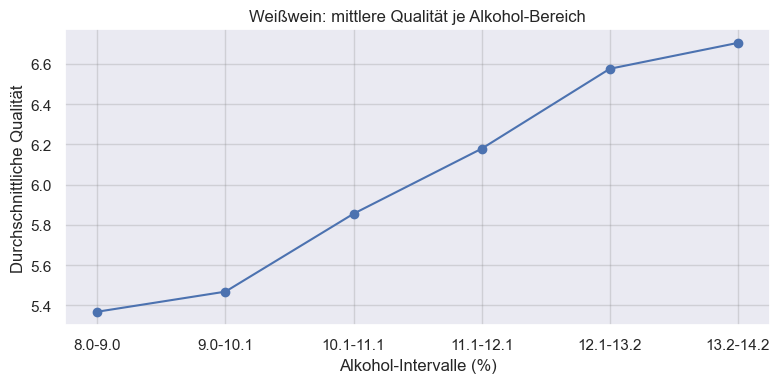

In [68]:
plot_binned_quality(ww, "Weißwein: mittlere Qualität je Alkohol-Bereich")

### Rotwein-Code

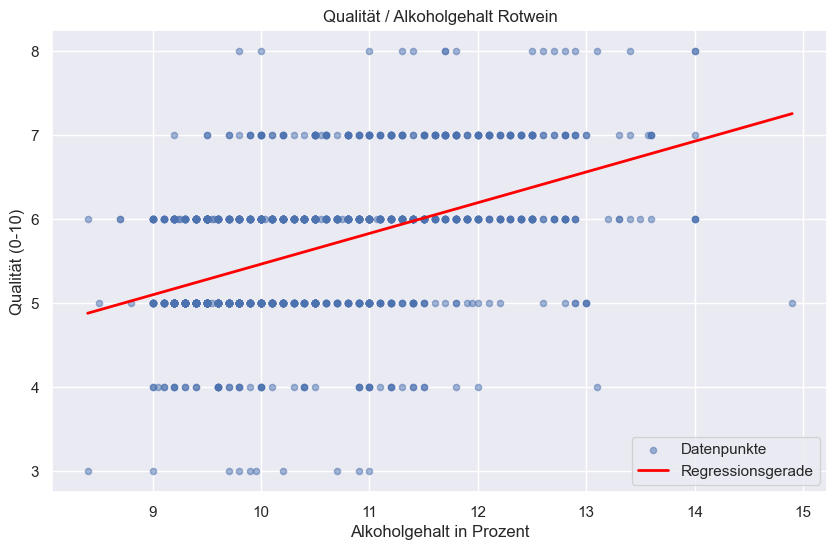

In [69]:
x = rw["alcohol"]
y = rw["quality"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=20, label="Datenpunkte")
plt.grid(True)

# Erstellung Regressionsgerade
m, c = np.polyfit(x, y, 1)
x_sorted = np.sort(x)
y_regression = m * x_sorted + c
plt.plot(x_sorted, y_regression, color='red', linewidth=2, label=f'Regressionsgerade')

plt.title("Qualität / Alkoholgehalt Rotwein")
plt.xlabel("Alkoholgehalt in Prozent")
plt.ylabel("Qualität (0-10)")
plt.legend()
plt.show()

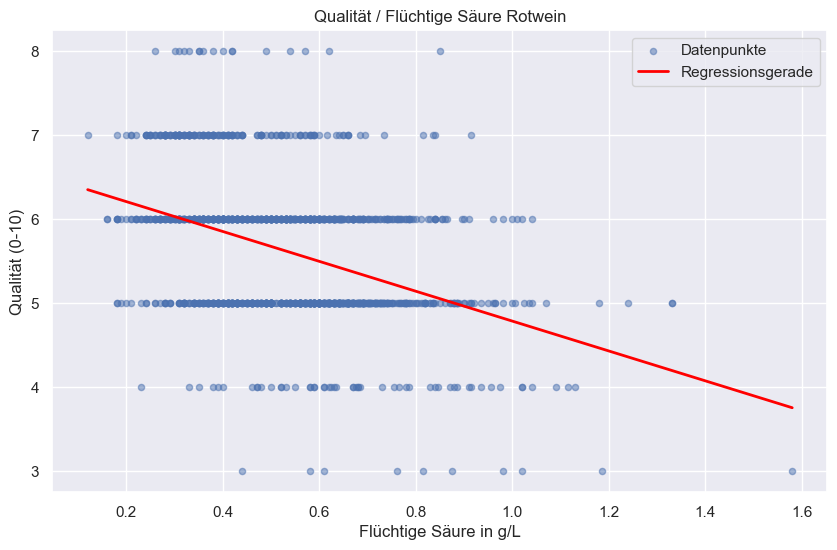

In [70]:
x = rw["volatile acidity"]
y = rw["quality"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=20, label="Datenpunkte")
plt.grid(True)

# Erstellung
m, c = np.polyfit(x, y, 1)
x_sorted = np.sort(x)
y_regression = m * x_sorted + c
plt.plot(x_sorted, y_regression, color='red', linewidth=2, label=f'Regressionsgerade')

plt.title("Qualität / Flüchtige Säure Rotwein")
plt.xlabel("Flüchtige Säure in g/L") # also volatile acidity
plt.ylabel("Qualität (0-10)")
plt.legend()
plt.show()

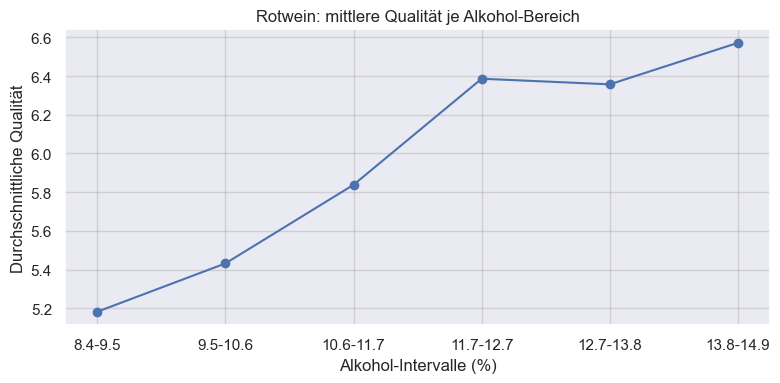

In [71]:
plot_binned_quality(rw, "Rotwein: mittlere Qualität je Alkohol-Bereich")

## Experimentieren Sie mit verschiedenen Diagrammtypen. Welche stellen sich als sinnvoll heraus, welche nicht und was fällt Ihnen auf? Können Sie neue Erkenntnisse gewinnen?

**Die Punkte der Scatterplots sind wenig aussagekräftig,** da daraus Zusammenhänge nicht klar ersichtlich werden.

**Regressionsgeraden sind sinnvoller,** denn aus der Steigung kann man erkennen, dass mit höherem Alkoholgehalt auch die Qualität steigt bzw. mit höherer flüchtiger Säure die Qualität sinkt. (gilt für beide Datensätze)

**Darstellung als Kurvendiagramm ebenfalls sinnvoll,** denn man kann klar erkennen, ob die Qualität mit höherem Alkoholgehalt ungleichmäßig oder linear ansteigt. Bei Weißwein z. B. steigt die Kurve nahezu linear.

# Aufgabe 5.1
## Analyse in Bezug auf Benfords Law - handelt es sich ggf. um synthetische Daten?

Bei den Spalten 'density', 'pH', 'alcohol' und 'quality' macht es keinen Sinn, Benford's Law anzuwenden, denn diese Werte bewegen sich auf einer sehr engen Spanne (beispielsweise liegt die Dichte immer bei rund 1, daher kommen nur 9 und 1 als erste Ziffer vor).

Wir prüfen die Benford-Verteilung bei den verbleibenden Spalten:

In [72]:
import plotly.graph_objects as go
import plotly.subplots as sp

possible_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

# Benford-Verteilung
benford_probs = {d: np.log10(1 + 1/d) for d in range(1, 10)}
benford_digits = list(benford_probs.keys())
benford_values = list(benford_probs.values())

# Funktion zur Extraktion der ersten Ziffer
def first_digit(x):
    x_str = str(abs(x))
    # Entferne Dezimalpunkt, falls vorhanden
    if '.' in x_str:
        x_str = x_str.replace('.', '')
    # Finde die erste von Null verschiedene Ziffer
    for char in x_str:
        if char.isdigit() and char != '0':
            return int(char)
    return None # Wenn alle Ziffern Null sind (z.B. 0, 0.000)
    
def create_benford_plots(dataframe, figure_title):
    # Subplots: 2 Reihen, 4 Spalten
    fig = sp.make_subplots(rows=2, cols=4, subplot_titles=possible_columns,horizontal_spacing=0.045,vertical_spacing=0.1)

    row, col = 1, 1
    first_iteration = True

    for column in possible_columns:
        digits = dataframe[column].apply(first_digit)
        # sicherstellen, dass nur Ziffern von 1-9 berücksichtigt werden
        digits = digits[digits.between(1, 9)]

        freq = digits.value_counts().sort_index()
        observed_digits = freq.index.tolist()
        # Vermeide Division durch Null, falls keine gültigen Ziffern vorhanden sind
        observed_values = freq.values / freq.values.sum() if freq.values.sum() > 0 else np.zeros_like(freq.values)

        # Balken für beobachtete Werte
        fig.add_trace(go.Bar(x=observed_digits,y=observed_values,name="Beobachtete Häufigkeit",marker_color='blue',showlegend=first_iteration),row=row, col=col)
        # Legende nur für die erste Iteration anzeigen

        # Balken für Benford-Häufigkeit
        fig.add_trace(go.Bar(x=benford_digits,y=benford_values,name="Benford-Häufigkeit",marker_color='red',showlegend=first_iteration),row=row, col=col)
        # Legende nur für die erste Iteration anzeigen

        # setzen auf False, damit nicht nochmal Legende ausgegeben wird
        first_iteration = False

        col += 1
        if col > 4:
            col = 1
            row += 1

    fig.update_layout(height=800, width=1200,title_text=figure_title,barmode='group')
    fig.show()

### Weißwein-Code

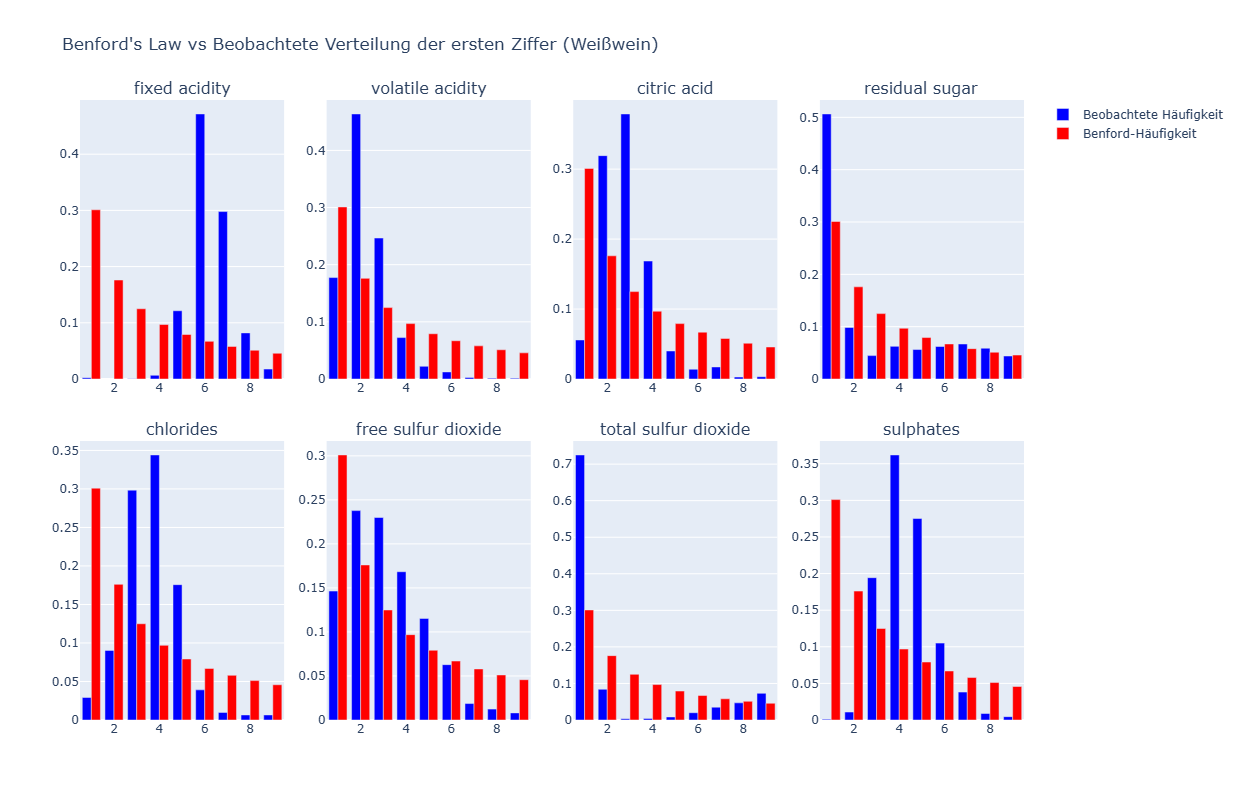

In [73]:
create_benford_plots(ww, "Benford's Law vs Beobachtete Verteilung der ersten Ziffer (Weißwein)")

### Rotwein-Code

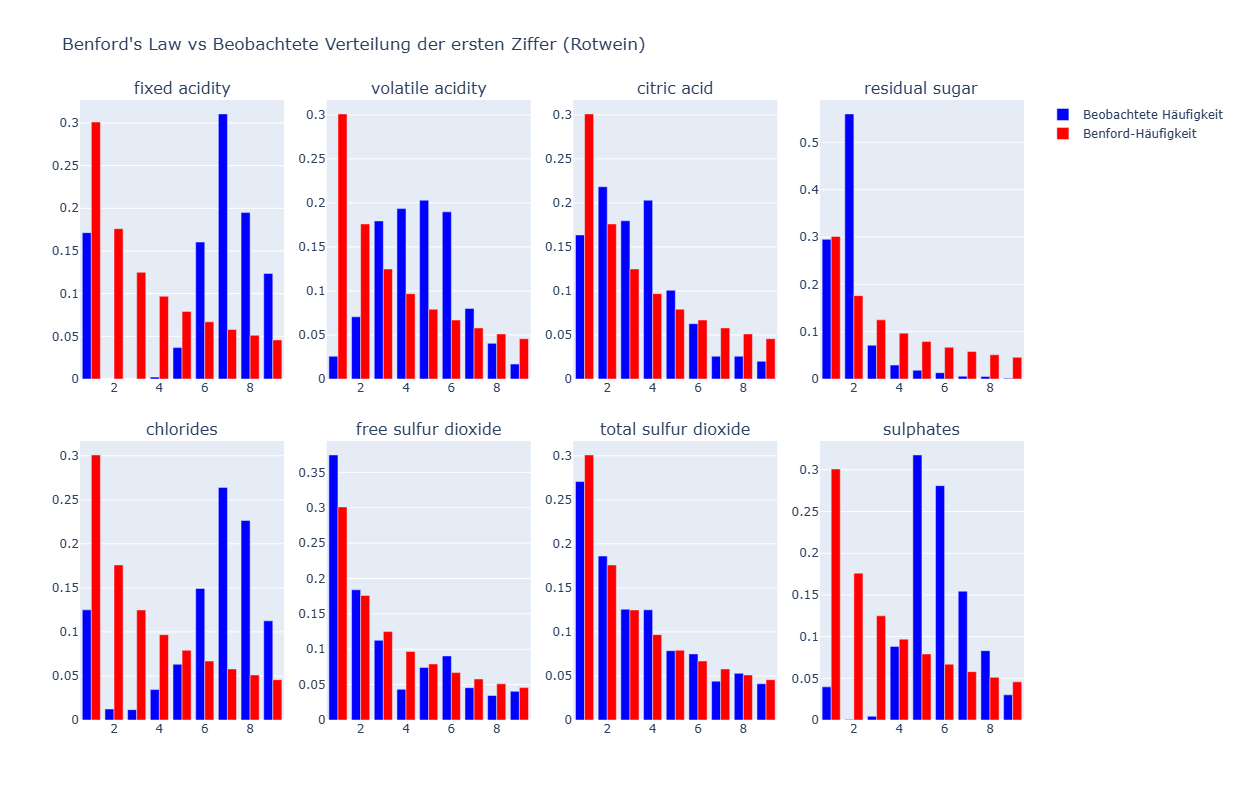

In [74]:
create_benford_plots(rw, "Benford's Law vs Beobachtete Verteilung der ersten Ziffer (Rotwein)")

**-> auch bei nahezu allen anderen Messeinheiten große Abweichungen zu Benford's Law**

Das liegt aber nicht daran, dass unsere Daten synthetisch erzeugt wurden, sondern daran, dass sie meist in einer **kleinen Spanne mit geringer Standardabweichung** liegen. Gerade bei den **Schwefeldioxiden** ist die **absolute Standartabweichung und die Spanne zwischen Minimum/Maximum groß**, weshalb dort näherungsweise Benford's Law zutrifft. Das ist besonders gut beim Rotwein zu sehen.

# Aufgabe 5.2

## Pairgrids für den Datensatz 

### Weißwein-Code

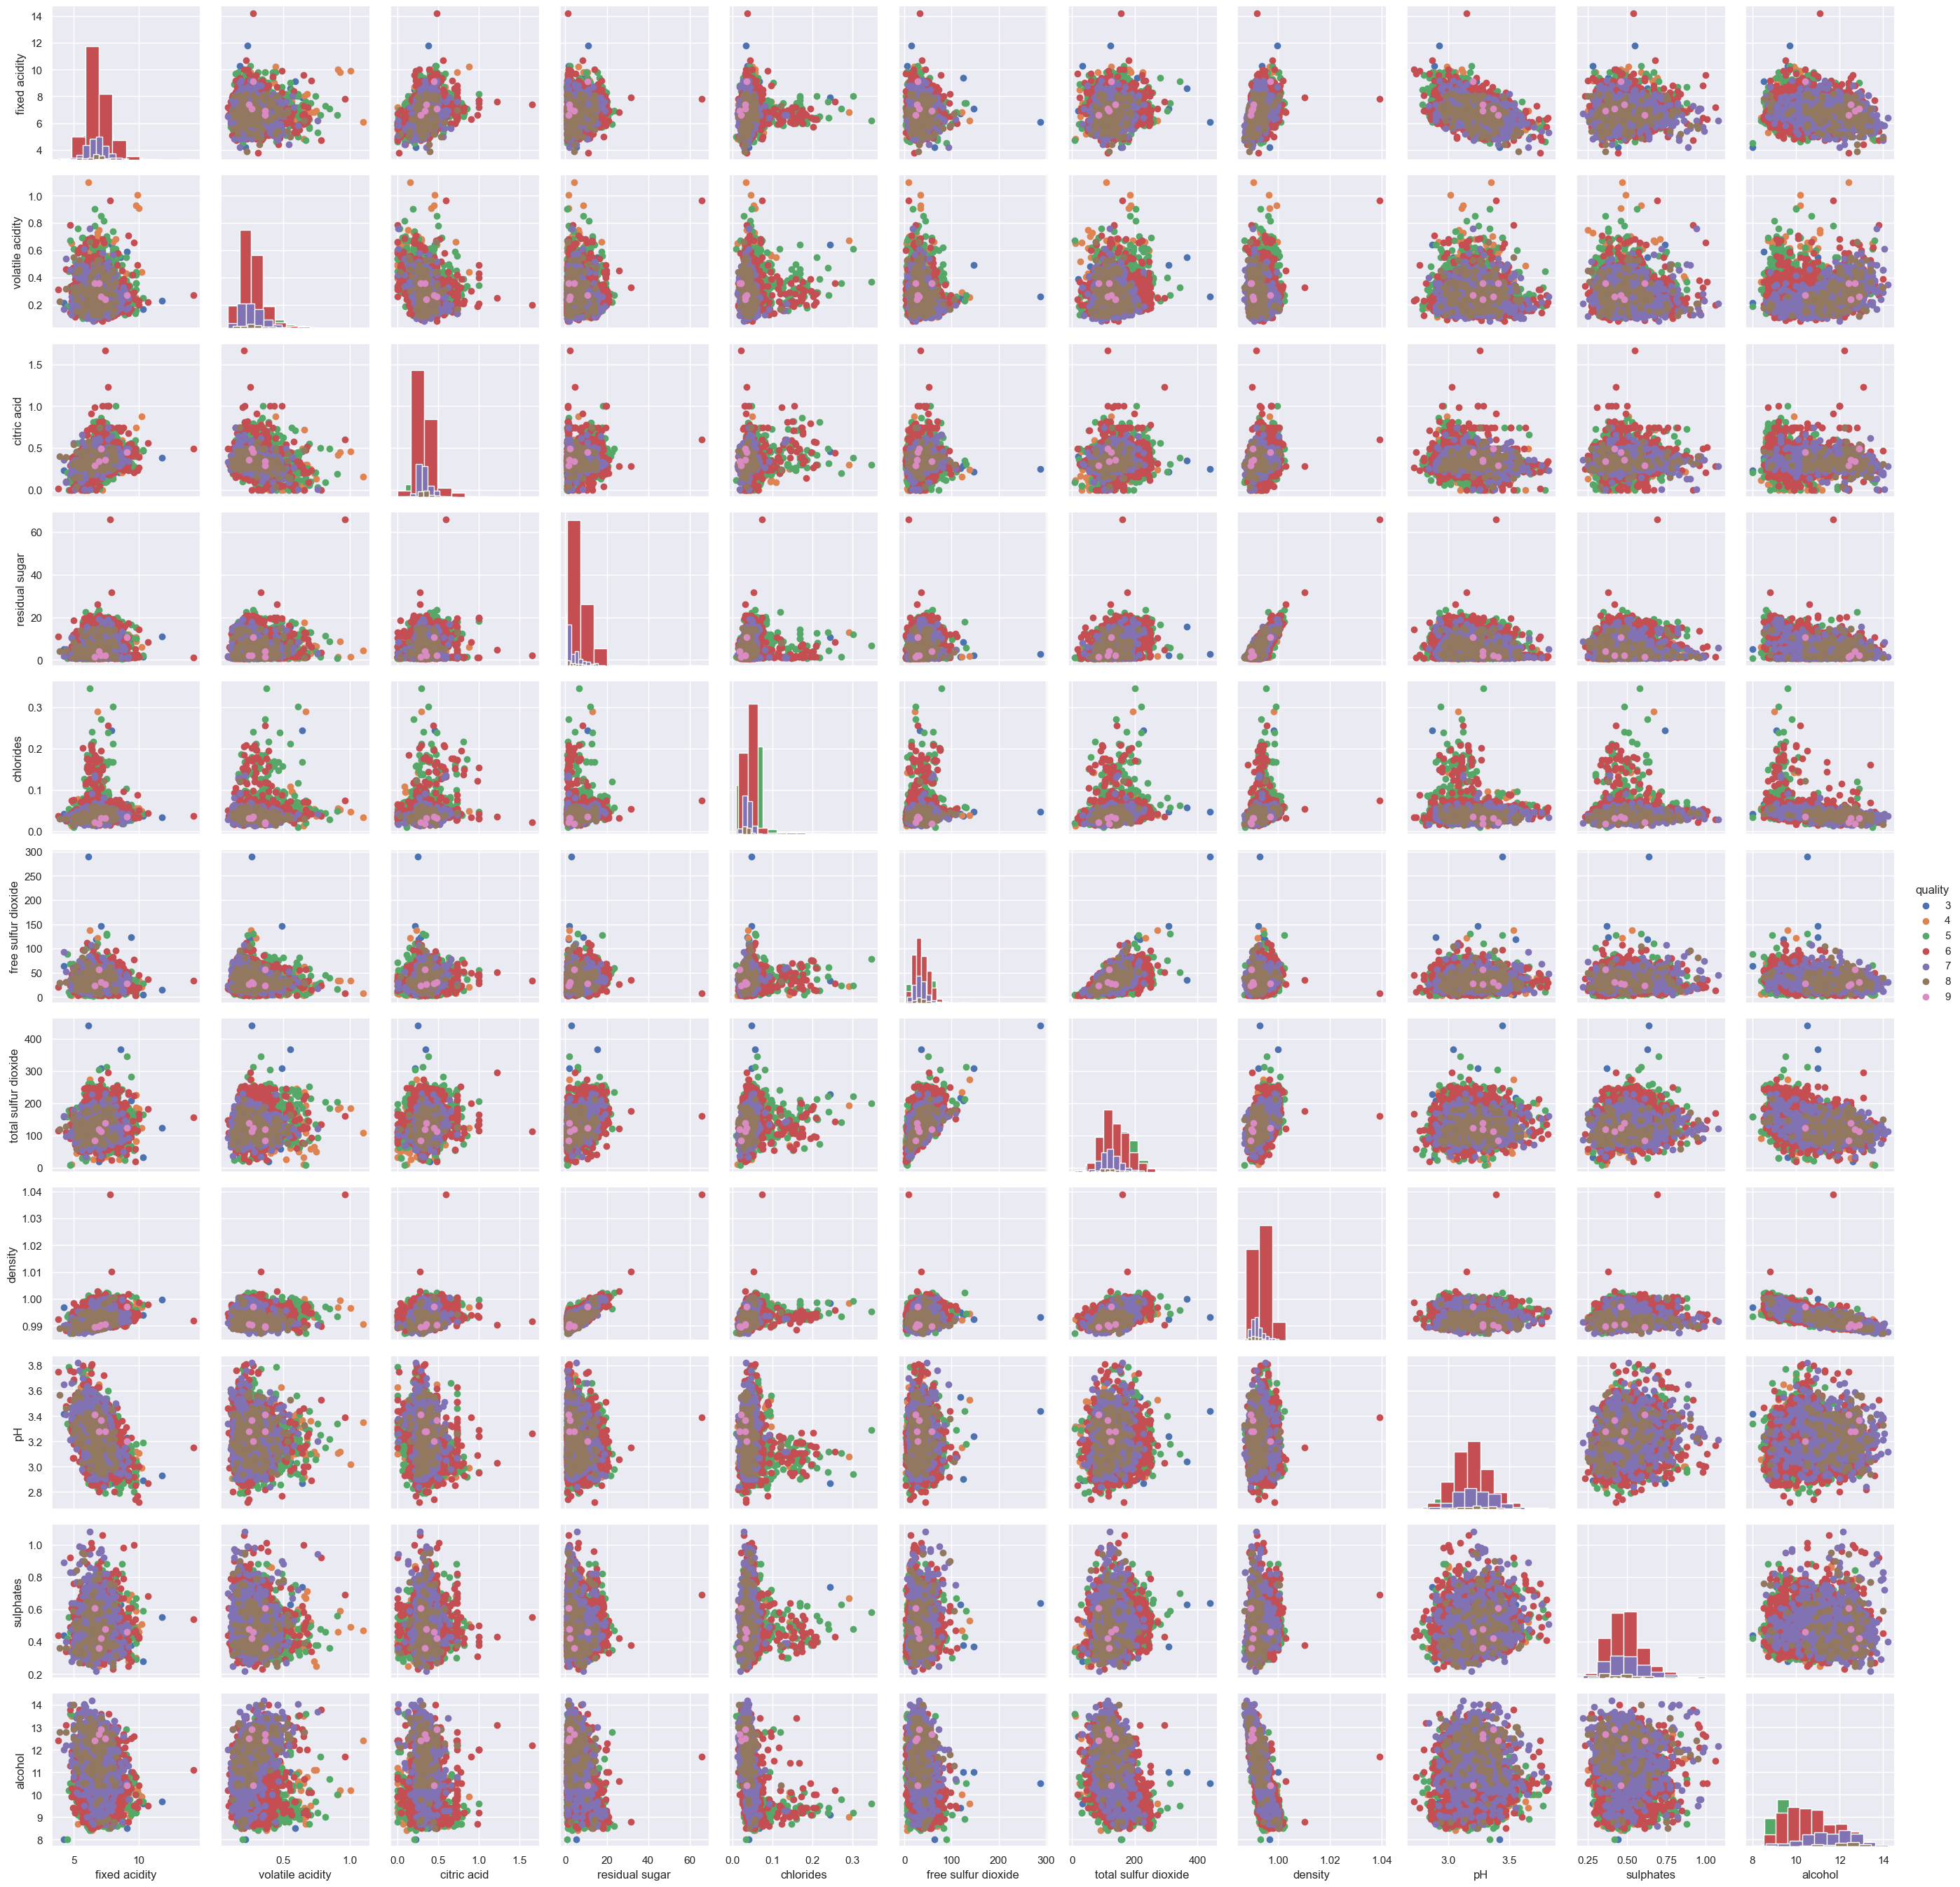

In [75]:
import seaborn as sns

white_pg = sns.PairGrid(ww, hue="quality")
white_pg.map_diag(plt.hist)
white_pg.map_offdiag(plt.scatter)
white_pg.add_legend()
plt.show()

### Rotwein-Code

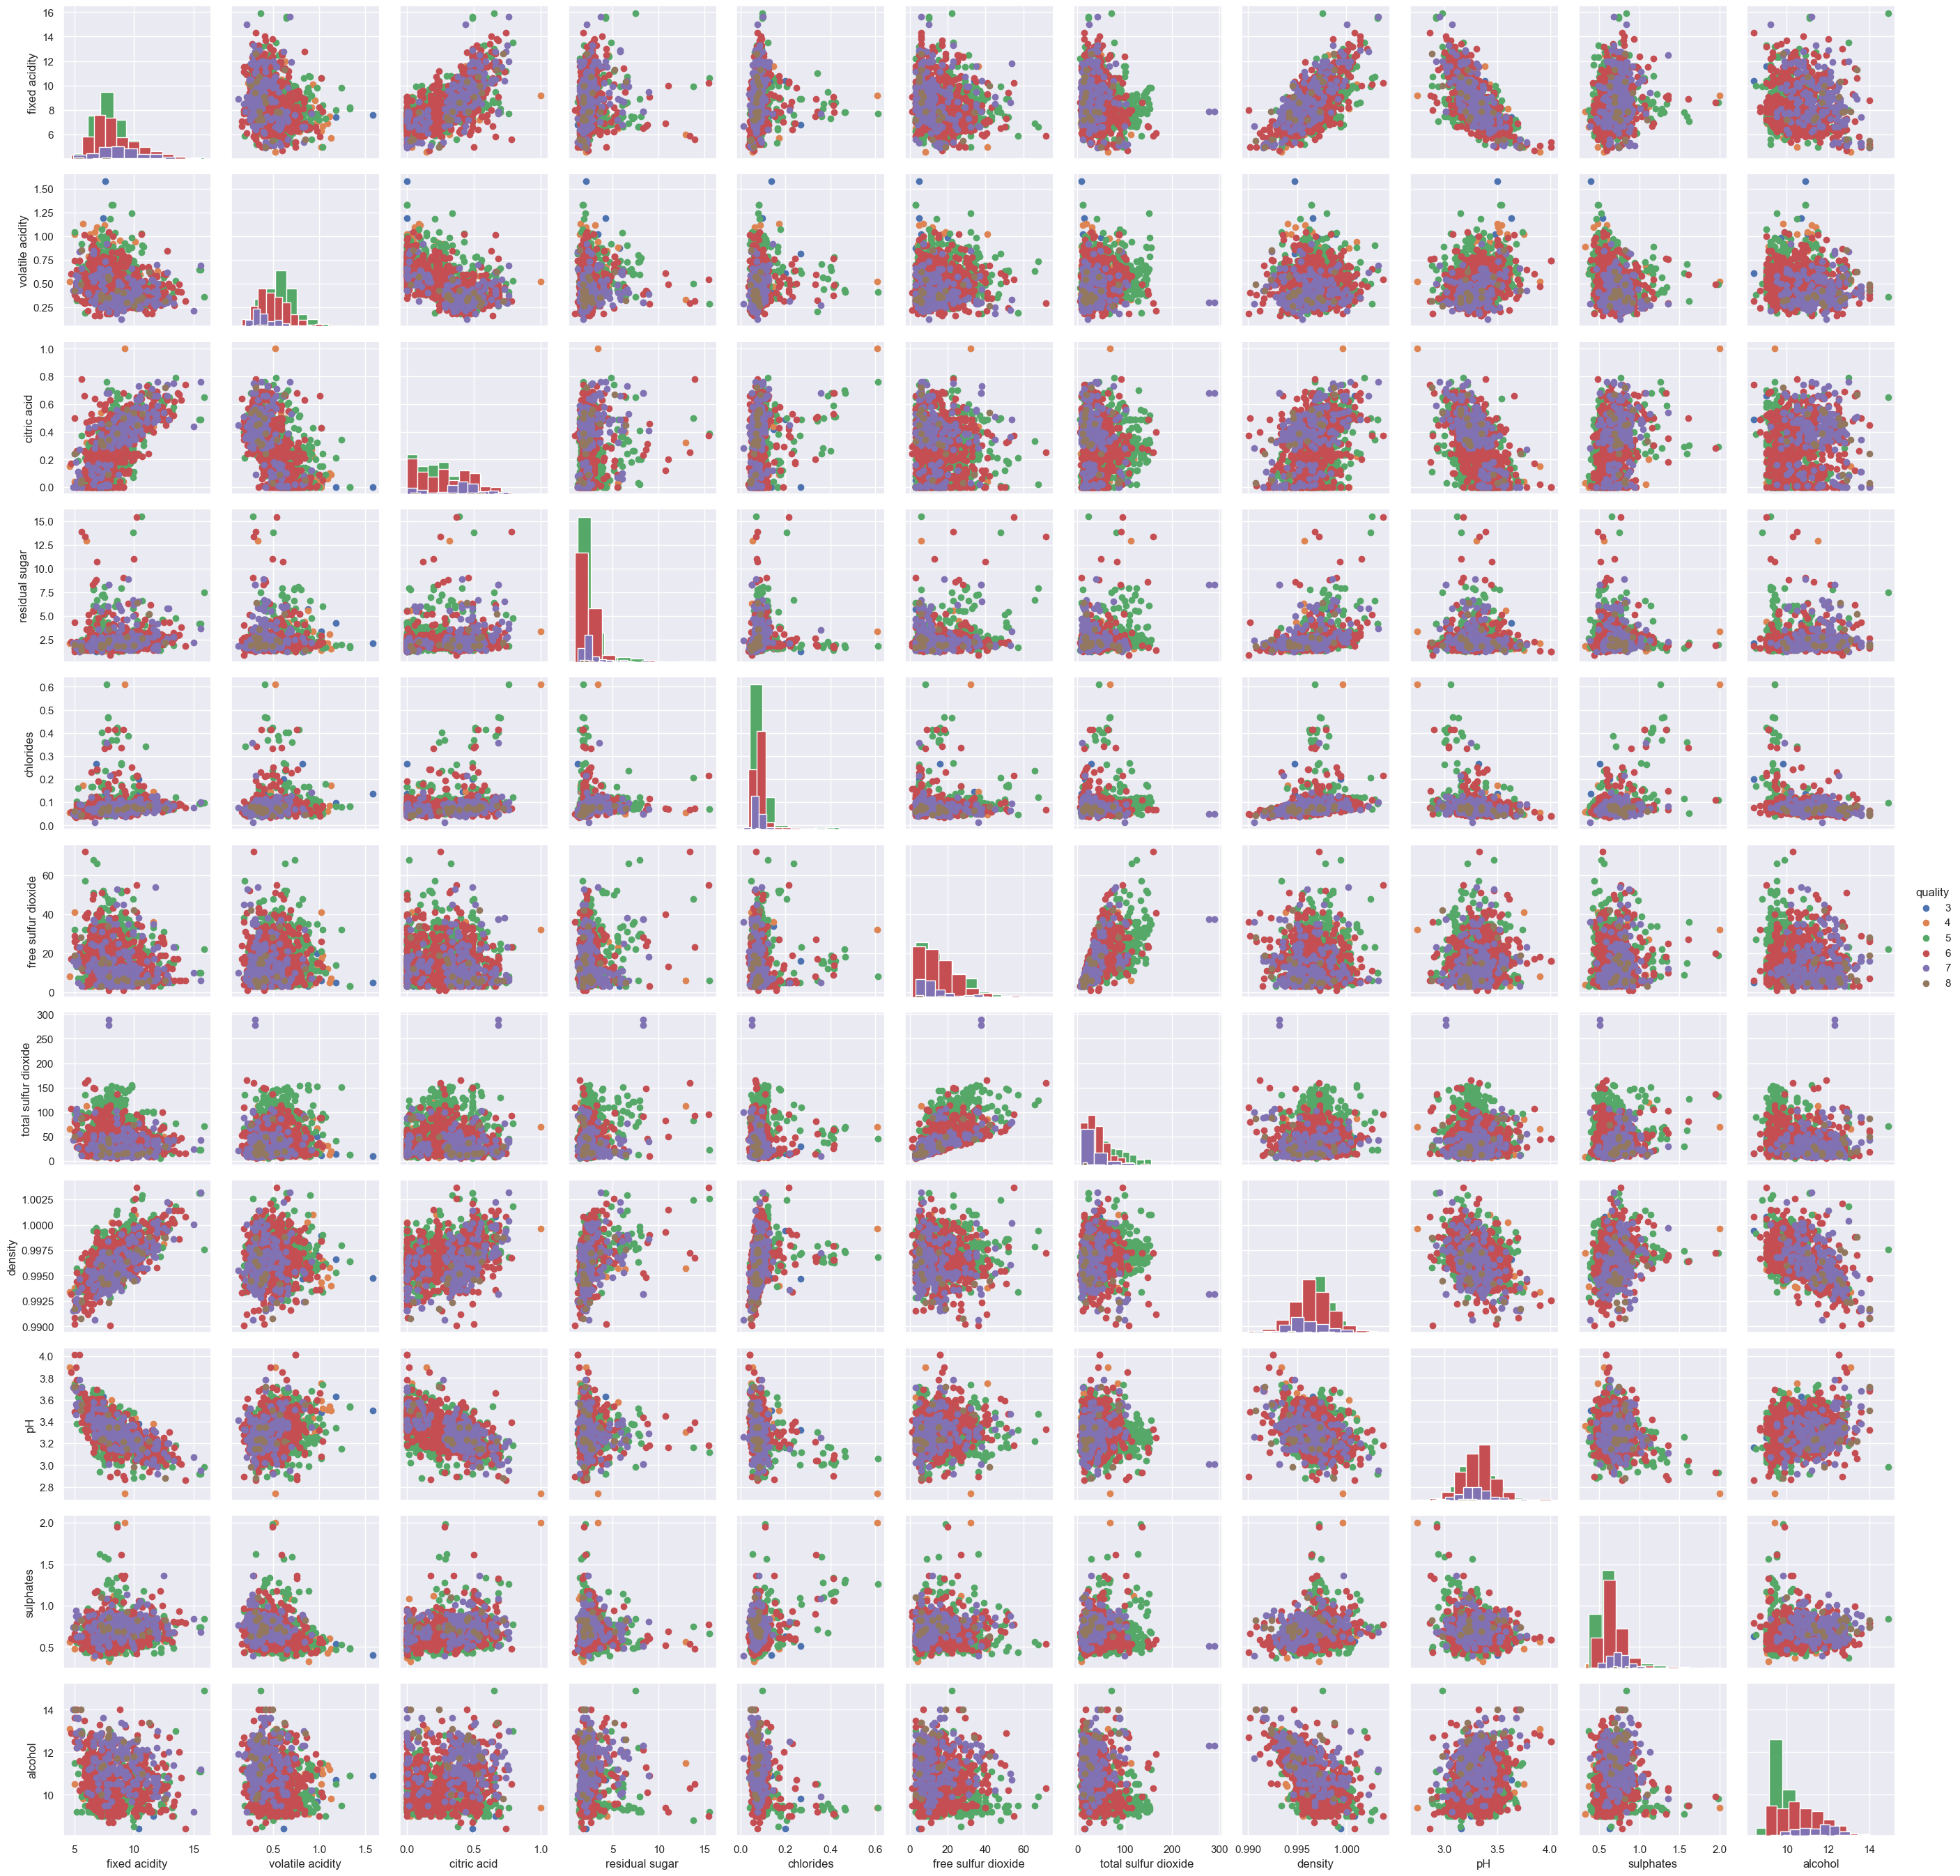

In [76]:
red_pg = sns.PairGrid(rw, hue="quality")
red_pg.map_diag(plt.hist)
red_pg.map_offdiag(plt.scatter)
red_pg.add_legend()
plt.show()

Aus den Abbildungen kann man **keine neuen Korrelationen** ablesen, aber **Ausreißer** können erkannt werden.

# Aufgabe 5.3

## Seaborn Boxplots

### Weißwein-Code

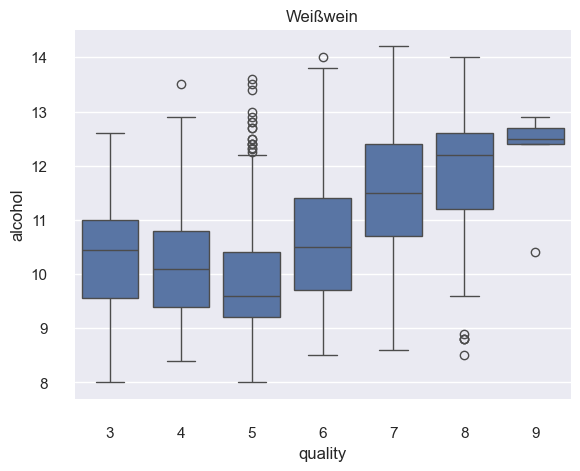

In [77]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.set_theme("notebook")

sns.boxplot(x="quality", y="alcohol", data=ww).set_title("Weißwein")
sns.despine(offset=10, trim=True)

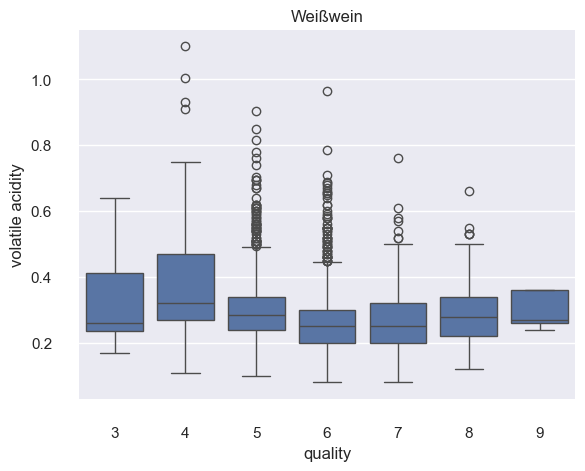

In [78]:
sns.set_theme(style="ticks")
sns.set_theme("notebook")

sns.boxplot(x="quality", y="volatile acidity", data=ww).set_title("Weißwein")
sns.despine(offset=10, trim=True)

### Rotwein-Code

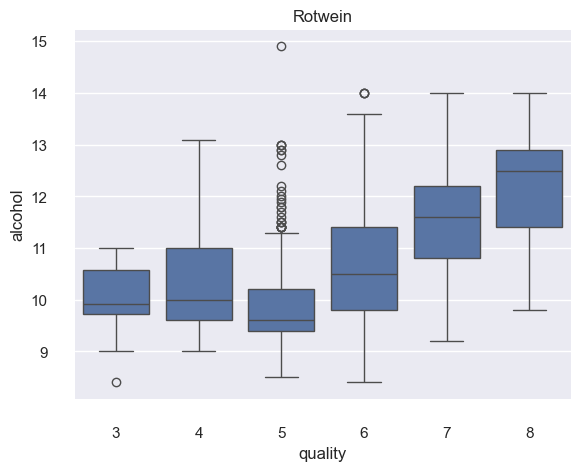

In [79]:
sns.set_theme(style="ticks")
sns.set_theme("notebook")

sns.boxplot(x="quality", y="alcohol", data=rw).set_title("Rotwein")
sns.despine(offset=10, trim=True)

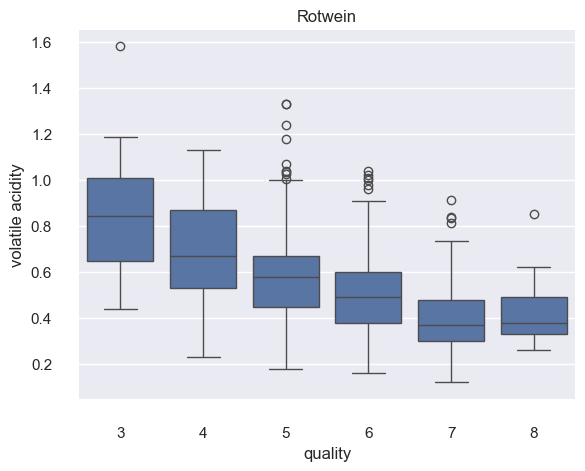

In [80]:
sns.set_theme(style="ticks")
sns.set_theme("notebook")

sns.boxplot(x="quality", y="volatile acidity", data=rw).set_title("Rotwein")
sns.despine(offset=10, trim=True)

Die Ergebnisse aus den Boxplots **decken sich mit unseren bisherigen Erkenntnissen** aus df.describe(), den Korrelationskoeffizienten und vorherigen Visualisierungen. Allerdings kann man in der Boxplot-Darstellung besser Ausreißer erkennen, besonders bei den Qualitäten 5 und 6.

# Aufgabe 5.4

## Visualisierung in Plotly (Heatmaps)

### Weißwein-Code

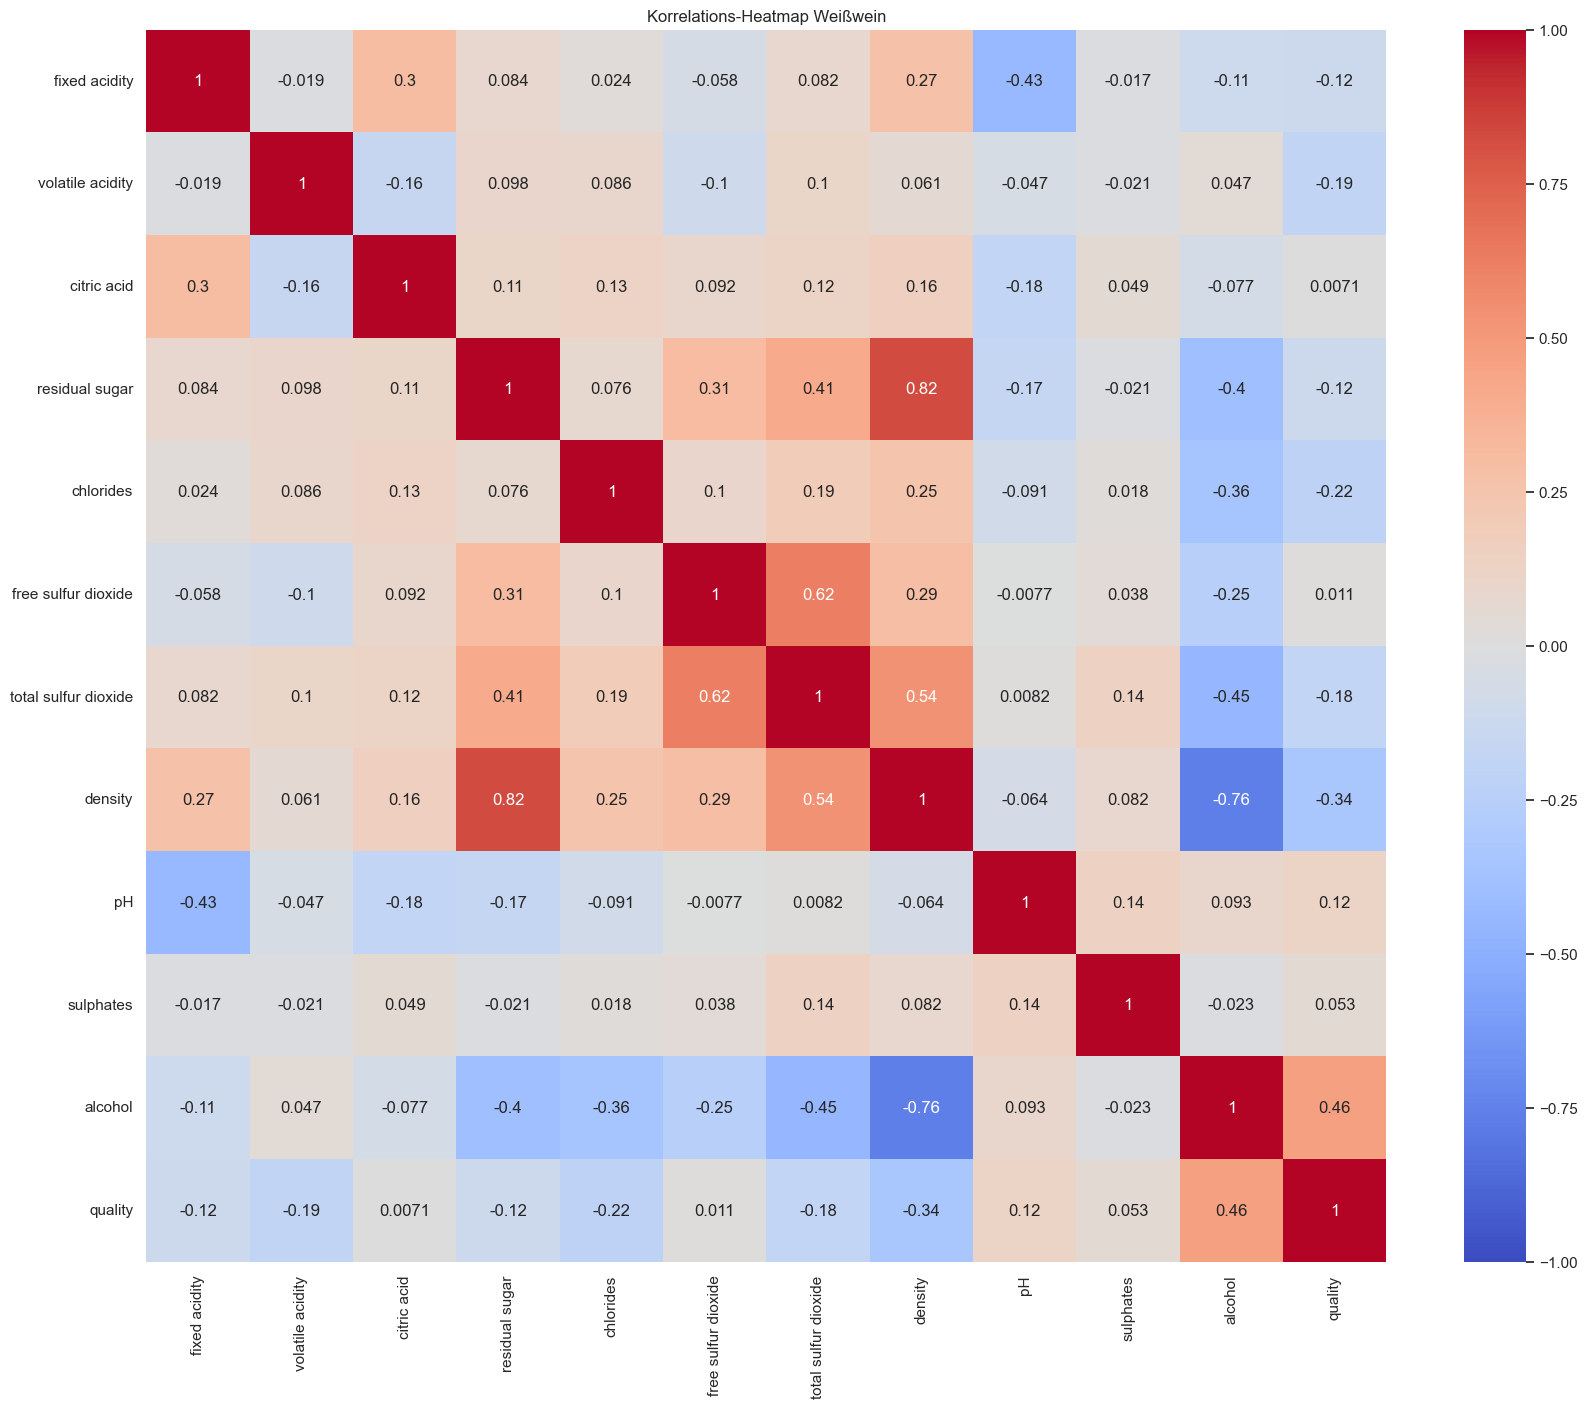

In [81]:
corr = ww[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
           "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]].corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin = -1, vmax = 1)
plt.title("Korrelations-Heatmap Weißwein")
plt.show()

### Rotwein-Code

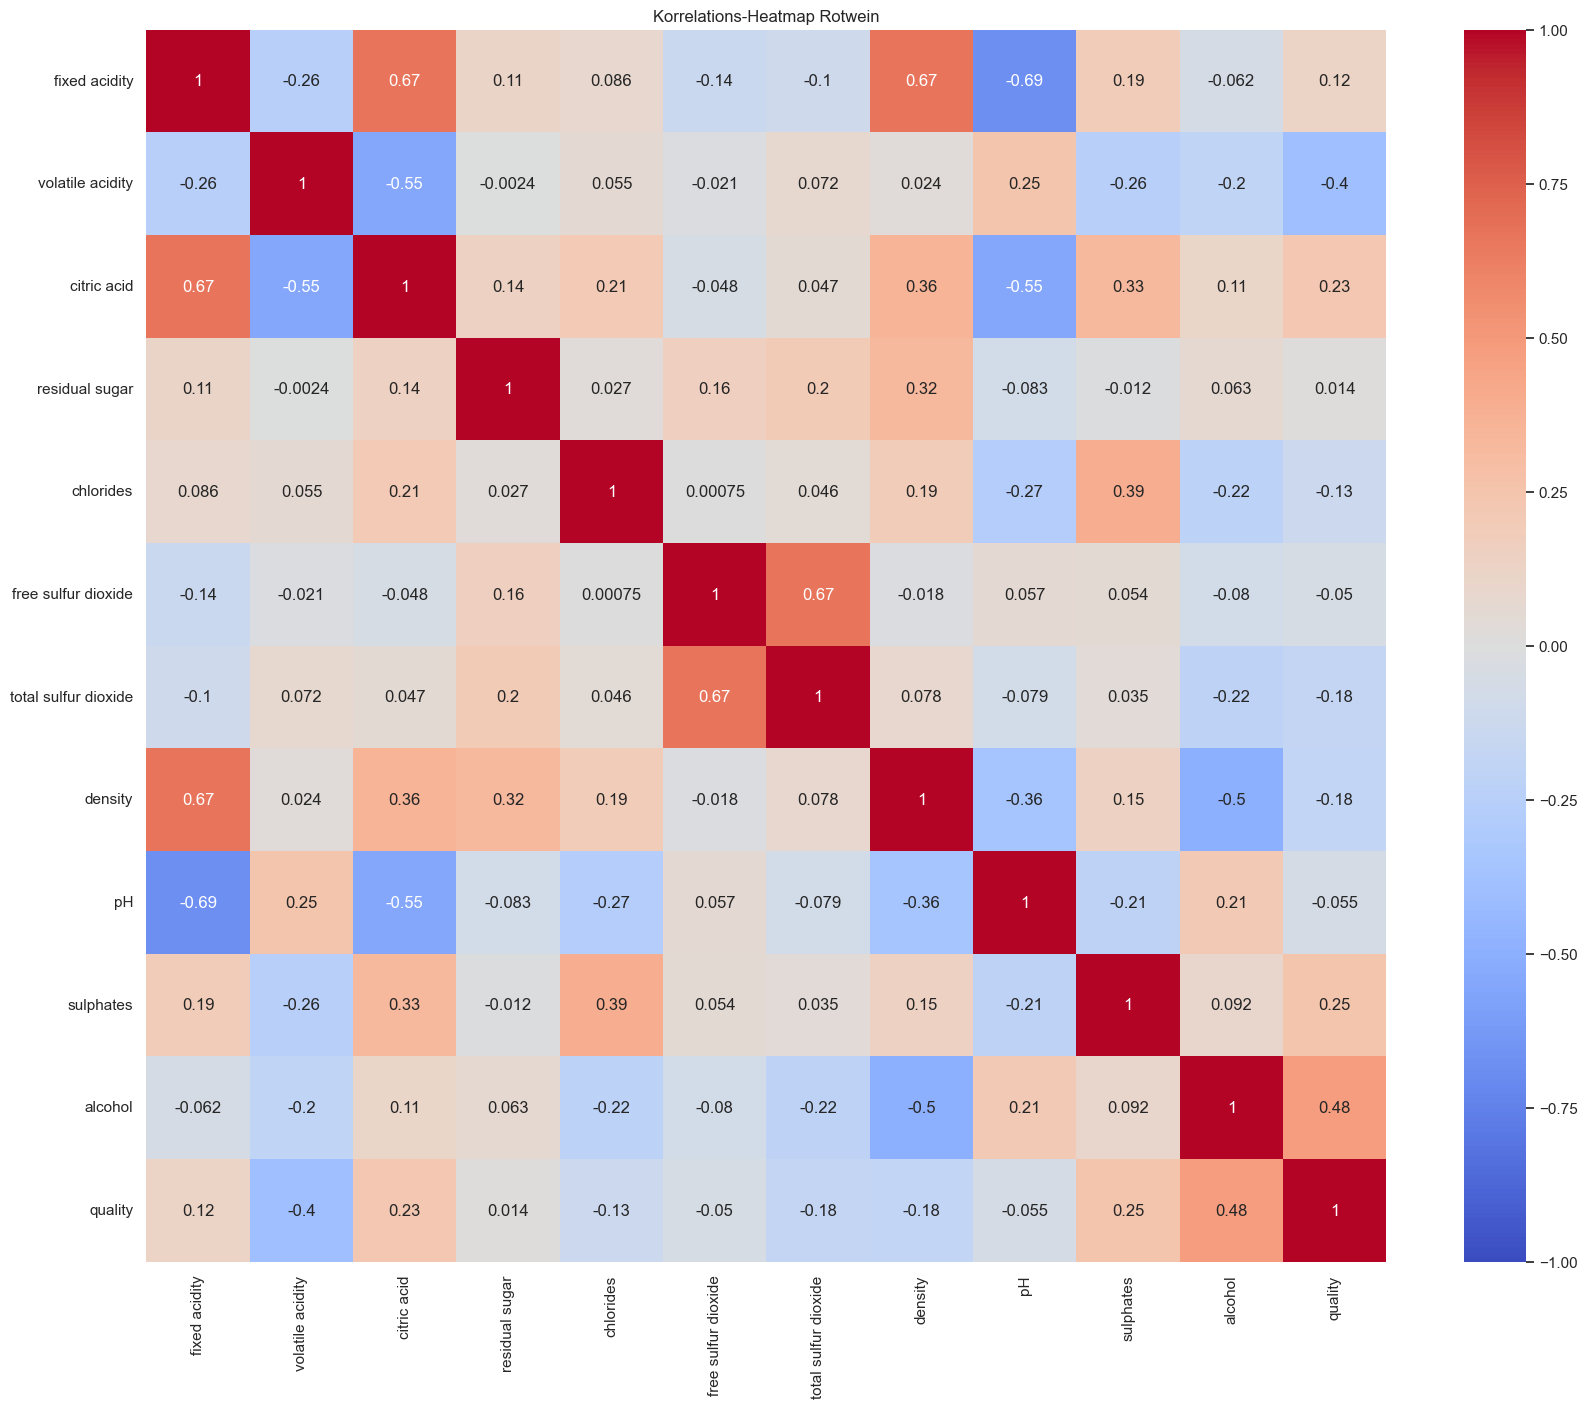

In [87]:
corr = rw[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
           "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]].corr()

plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin = -1, vmax = 1)
plt.title("Korrelations-Heatmap Rotwein")
plt.show()

Mit der Visualisierung der Heatmap erhalten wir einen **besseren Überblick über die Korrelationen**, was das Erkennen von signifikanten Werten in der großen Datenmenge erheblich vereinfacht.

# Aufgabe 6.1

## Analysieren Sie Ihren Datensatz in Bezug auf Datenqualität.

- **reale Einheiten mit passenden Werten** vorhanden, Werte scheinen realistisch (Alkohol ca. 10 %, usw.)

- **Qualität ist schwer neutral messbar** (basierend auf sensorischen Daten bzw. dem Geschmack mehrerer Testpersonen)

- **Ursprungsfrage** nach Zusammenhang zwischen Alkoholgehalt und Weinqualität ist **beantwortbar**

- mit **12 Parametern** sollte ein Wein relativ detailliert beschrieben werden können (zusätzlich ist Herkunft bekannt)

- im Betracht unserer Säurewerte (fixed acidity usw.) sind die **Daten konsistent** (siehe Aufgabe 2 Hypothesen)

- **ausreichende Genauigkeit** (oft mehrere Kommastellen)

- Aktualität: Die Inhaltsstoffe von Wein haben/werden sich nicht stark ändern, da es (zumindest ein verarbeitetes) Naturprodukt ist.

In [83]:
print(ww_original.isna().sum())
print(rw_original.isna().sum())


print(ww.isna().sum())
print(rw.isna().sum())
# keine NaN-values in beiden Datensätzen, auch im Original-Datensatz mit Duplikaten

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0

# Aufgabe 6.2

## Analysieren Sie Ihren Datensatz in Bezug auf fehlende Werte. Falls Werte fehlen, wie gehen Sie damit um?

- keine fehlenden Werte (auf Datensatz-Webseite angegeben [missing values - no], deckt sich mit unseren Erkenntnissen aus df.describe())
- "count" aus describe-Tabellen entspricht jeweils der Zeilenanzahl des Dataframes
- daher kein Ersetzen oder Löschen nötig

# Aufgabe 6.3 <a id="aufgabe-6.3"></a>

## Analysieren Sie den von Ihnen gewählten Datensatz in Bezug auf Duplikate. Löschen Sie Duplikate. Wie verändern sich die Anzahl von Zeilen und Spalten?

In [86]:
print(f"Duplikate im Weißwein-Datensatz: {ww_original.duplicated().sum()} Stück (ganze Zeile schon mind. einmal vorgekommen)\n")

print(f"Duplikate im Weißwein-Datensatz: {rw_original.duplicated().sum()} Stück (ganze Zeile schon mind. einmal vorgekommen)")

Duplikate im Weißwein-Datensatz: 937 Stück (ganze Zeile schon mind. einmal vorgekommen)

Duplikate im Weißwein-Datensatz: 240 Stück (ganze Zeile schon mind. einmal vorgekommen)


-> insgesamt (937 + 240 =) **1177 Duplikate**, bei denen genau die **selbe Zeile schon mindestens einmal zuvor vorgekommen** ist 

Wir **entfernen diese "perfekten" Duplikate,** da wir ganze Zeilen betrachtet haben (alle Parameter). Dopplungen sind hier sehr unwahrscheinlich, da wir 12 Parameter untersuchen, die in der Regel mit mehreren Nachkommastellen angegeben sind. **Von Anfang an nutzen wir daher zur Untersuchung den Datensatz ohne diese Duplikate.**

Diese Duplikate könnten z. B. folgendermaßen entstanden sein:
- versehentliche Wiederholung bei der Dateneingabe
- Fehler beim Importieren oder Zusammenführen von Daten
- mehrfaches Messen derselben Probe, spätere Betrachtung als separate Weinproben

### Anzahl Zeilen (ursprünglich / nach Entfernung der Duplikate)

Weißwein: 4898 / (4898 - 937 =) 3961

Rotwein: 1599 / (1599 - 240 =) 1359

Spaltenanzahl bleibt gleich (12 in allen Fällen).

# Fazit

Durch die Betrachtung von Visualisierungen, Tabellen und Nutzung weiterer Funktionalitäten konnten wir herausfinden, dass tatsächlich **qualitativ hochwertiger Wein tendenziell mehr Alkoholanteil hat**.  
Außerdem ist zu beobachten, dass **mit steigender Menge an flüchtiger Säure im Wein die geschmackliche Qualität sinkt**.  
Zwischen den **anderen physikalischen Größen** haben wir **keine signifikanten Korrelationen** gefunden.  
Somit konnten wir die **Aussage aus Quelle 2** (siehe Zitat) **bestätigen**.  
Korrelationen, die laut Quelle 1 von Bedeutung seien, konnten wir nicht feststellen.